In [1]:
import pandas as pd 
import time 

In [2]:
df = pd.read_csv(r'D:\My Drive\Social_Network_Ads.csv')
df 

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
X = df.iloc[:,0:2]
X 

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [4]:
y = df.iloc[:,-1]
y 

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled 

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
X_train.shape

(320, 2)

In [8]:
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense 

In [9]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 

In [10]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_train,y_train,epochs=10,batch_size=320,validation_split=0.2)
print(time.time()-start)  


Epoch 1/10


1/1 [==============================] - 1s 1s/step - loss: 2993.7034 - accuracy: 0.3945 - val_loss: 2554.3450 - val_accuracy: 0.3125
Epoch 2/10
1/1 [==============================] - 0s 50ms/step - loss: 2411.4521 - accuracy: 0.3945 - val_loss: 2103.7534 - val_accuracy: 0.3125
Epoch 3/10
1/1 [==============================] - 0s 50ms/step - loss: 1986.0691 - accuracy: 0.3945 - val_loss: 1723.9578 - val_accuracy: 0.3125
Epoch 4/10
1/1 [==============================] - 0s 50ms/step - loss: 1627.5215 - accuracy: 0.3945 - val_loss: 1384.8362 - val_accuracy: 0.3125
Epoch 5/10
1/1 [==============================] - 0s 50ms/step - loss: 1307.3724 - accuracy: 0.3945 - val_loss: 1072.4165 - val_accuracy: 0.3125
Epoch 6/10
1/1 [==============================] - 0s 50ms/step - loss: 1012.4314 - accuracy: 0.3945 - val_loss: 778.9113 - val_accuracy: 0.3125
Epoch 7/10
1/1 [==============================] - 0s 50ms/step - loss: 735.3465 - accuracy: 0.3945 - val_loss: 499.4754 - val_accu

In [12]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history1 = model.fit(X_train,y_train,epochs=10,batch_size=1,validation_split=0.2) #stochastic
print(time.time()-start)  

Epoch 1/10
256/256 [==============================] - 2s 4ms/step - loss: 142.0614 - accuracy: 0.4844 - val_loss: 164.7186 - val_accuracy: 0.3125
Epoch 2/10
256/256 [==============================] - 1s 3ms/step - loss: 131.2817 - accuracy: 0.4805 - val_loss: 9.7748 - val_accuracy: 0.6875
Epoch 3/10
256/256 [==============================] - 1s 3ms/step - loss: 126.3122 - accuracy: 0.4961 - val_loss: 85.1118 - val_accuracy: 0.6875
Epoch 4/10
256/256 [==============================] - 1s 3ms/step - loss: 134.0519 - accuracy: 0.4570 - val_loss: 120.5313 - val_accuracy: 0.6875
Epoch 5/10
256/256 [==============================] - 1s 3ms/step - loss: 129.0581 - accuracy: 0.4688 - val_loss: 36.6402 - val_accuracy: 0.6875
Epoch 6/10
256/256 [==============================] - 1s 3ms/step - loss: 120.3076 - accuracy: 0.4922 - val_loss: 140.2462 - val_accuracy: 0.3125
Epoch 7/10
256/256 [==============================] - 1s 3ms/step - loss: 118.9192 - accuracy: 0.5234 - val_loss: 266.5273 - val

In [13]:
import matplotlib.pyplot as plt 

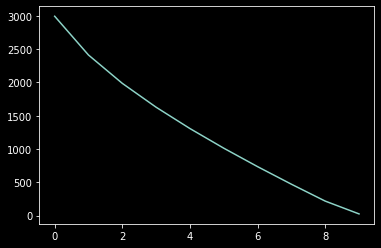

In [14]:
plt.plot(history.history['loss'])

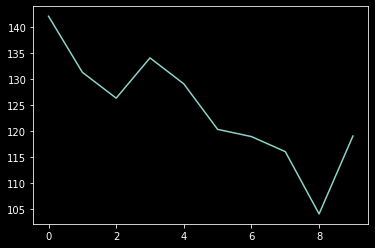

In [15]:
plt.plot(history1.history['loss']) #stochastic 